In [1]:
%load_ext autoreload

%autoreload 2

In [2]:

import pyfasst.audioModel as am
filename = 'No Surprises.wav'


Using scipy.io.wavfile


/Users/samuelhodges/PycharmProjects/pyfasst/pyfasst/tftransforms/nsgt/__init__.py:37: UserWarning: Audio IO routines (scikits.audio module) could not be imported
  warn("Audio IO routines (scikits.audio module) could not be imported")


In [3]:
# initialize the model
model = am.MultiChanNMFConv(audio=filename,nbComps=2, nbNMFComps=32, spatial_rank=1,verbose=1, iter_num=1)

('Computing the chosen signal representation:', 'stft')
    re-normalizing components


In [4]:
# # estimate the parameters
# model.estim_param_a_post_model()


In [5]:
# to be more flexible, the user _has to_ make the parameters
# convolutive by hand. This way, she can also start to estimate
# parameters in an instantaneous setting, as an initialization,
# and only after "upgrade" to a convolutive setting:
model.makeItConvolutive()

In [5]:
# # separate the sources using these parameters
# model.separate_spat_comps(dir_results='data/')

In [25]:
# we can initialize these parameters with the DEMIX algorithm:
model.initializeConvParams(initMethod='demix')

Computing the chosen signal representation:


/Users/samuelhodges/PycharmProjects/pyfasst/pyfasst/audioModel.py:2258: UserWarning: Spatial component 0 already not instantaneous, overwriting...
  "already not instantaneous, overwriting...")
/Users/samuelhodges/PycharmProjects/pyfasst/pyfasst/audioModel.py:2258: UserWarning: Spatial component 1 already not instantaneous, overwriting...
  "already not instantaneous, overwriting...")


ValueError: This implementation only deals with stereo audio!

In [6]:
# and estimate the parameters:
model.estim_param_a_post_model()

Iteration 1 on 1
    Computing sufficient statistics
number of 0s in det  0
number of 0s left in det 0
    Updating mixing matrix, convolutive sources
    Update the spectral components
    re-normalizing components
    log-likelihood: -8.46216517121


/Users/samuelhodges/PycharmProjects/pyfasst/pyfasst/audioModel.py:398: ComplexWarning: Casting complex values to real discards the imaginary part
  logliks[i] = self.GEM_iteration()


array([-8.46216517])

In [7]:
# separate the sources using these parameters
model.separate_spat_comps(dir_results='data/')

number of 0s in det  0
number of 0s left in det 0
Changing encoding to int16
Changing encoding to int16


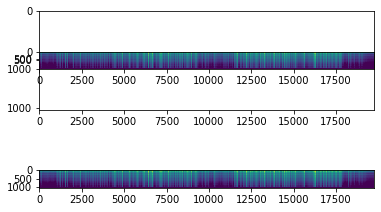

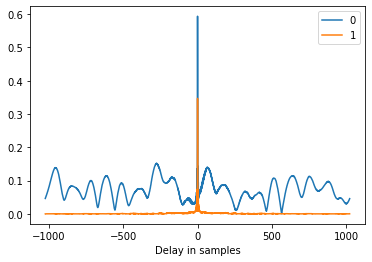

In [9]:
import pyfasst.tools.plotTools as pt
# display the estimated spectral components
# (one per row of subplot)
pt.subplotsAudioModelSpecComps(model)
# display a graph showing where the sources have been "spatially"
# estimated: in an anechoic case, ideally, the graph for the
# corresponding source is null everywhere, except at the delay
# between the two channels:
delays, delayDetectionFunc = pt.plotTimeCorrelationMixingParams(model)